# Object Detection with YOLOv8 Ultralytics

In this notebook, we will learn about how to do object detection with ultralytics' YOLOv8.

For more information, you can check at the [official documentation](https://docs.ultralytics.com/).

In [1]:
!pip install ultralytics
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
COCO_CLASSES = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

## Simple API

Ultralytics already provides a very confenient API to use the models. Let's use it as a quickstart example.

In [4]:
from ultralytics import YOLO

model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:02<00:00, 56.1MB/s]


In [7]:
results = model.predict("mobil.jpeg", save=True)


image 1/1 /content/mobil.jpeg: 384x640 12 cars, 353.6ms
Speed: 3.6ms preprocess, 353.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


Let's investigate the results output

In [8]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.], device='cuda:0')
conf: tensor([0.9147, 0.8857, 0.8826, 0.8766, 0.8596, 0.7830, 0.6923, 0.6336, 0.4815, 0.3995, 0.3772, 0.3002], device='cuda:0')
data: tensor([[2.4401e+02, 5.6677e+01, 2.9986e+02, 1.2624e+02, 9.1474e-01, 2.0000e+00],
        [3.6681e+01, 6.8701e+01, 7.1019e+01, 1.0800e+02, 8.8569e-01, 2.0000e+00],
        [2.1551e+02, 6.6810e+01, 2.6123e+02, 1.0647e+02, 8.8264e-01, 2.0000e+00],
        [5.1663e-02, 6.1876e+01, 4.7835e+01, 1.1978e+02, 8.7662e-01, 2.0000e+00],
        [4.2347e+01, 6.3948e+01, 9.4986e+01, 1.0141e+02, 8.5960e-01, 2.0000e+00],
        [2.0532e+02, 6.2397e+01, 2.5883e+02, 9.6896e+01, 7.8301e-01, 2.0000e+00],
        [1.0823e+02, 6.6335e+01, 1.2670e+02, 8.4077e+01, 6.9225e-01, 2.0000e+00],
        [8.1629e+01, 6.6452e+01, 1.0214e+02, 9.0642e+01, 6.3355e-01, 2.0000e+00],
        [8.0202e+01, 6.4531e+01, 1.1054e+02, 8.9468e+01, 4.8149e-01, 2.00

The ultralytics also provide object tracking API, let's try it! It may take some minutes

In [12]:
video = "Camera Highway Surveillance.mp4"
results = model.track(video, save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/2301) /content/Camera Highway Surveillance.mp4: 384x640 (no detections), 62.1ms
video 1/1 (frame 2/2301) /content/Camera Highway Surveillance.mp4: 384x640 1 clock, 61.9ms
video 1/1 (frame 3/2301) /content/Camera Highway Surveillance.mp4: 384x640 (no detections), 42.6ms
video 1/1 (frame 4/2301) /content/Camera Highway Surveillance.mp4: 384x640 (no detections), 42.6ms
video 1/1 (frame 5/2301) /content/Camera Highway Surveillance.mp4: 3

## Behind the Scenes

The Ultralytics package that we have been using above is very simple to use and enough for some cases. However, that was borign for a ML engineer. As a ML engineer, you are expected to understand what happens under the hood.

When developing ML application, sometimes you need to go depeer and modify some parts by yourself.

Note that the example below is based on the official example [here](https://github.com/ultralytics/ultralytics/blob/main/examples/YOLOv8-ONNXRuntime/main.py).

### Introcution to ONNX

Ultralytics package already bundled with the pre-processing, model inference, and post-processing. In this part, we will export the YOLOv8 model into a plain ML model format, which is ONNX, which doesn't include any pre-processing and post-processing, just pure model for inference.

ONNX format, is a famous format that is simple and framework-agnostic, i.e., many popular DL frameworks support model export to ONNX. The advantage of using ONNX is as follow:

- Standard model layers (negative effect: it does not support highly customized model by default)
- Less model size and memory utilization
- Sometimes can be faster
- Simplify deployment. Model developer may use PyTorch, TensorFlow, MXNet, etc. to build model, but the engineer may only use ONNX for inference in deployment.
- More language support. Model developer mainly use Python for development, but deployment can use C++, Rust, etc.
- Intermediary format to other hardware optimized format such as TensorRT or OpenVino

Of course, Ultralytics provide us a very simple way to export model to ONNX.

In [13]:
from ultralytics import YOLO

model = YOLO('yolov8x.pt')

In [14]:
model.export(format="onnx")

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs

PyTorch: starting from 'yolov8x.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (130.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 220.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.0s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 12.2s, saved as 'yolov8x.onnx' (260.4 MB)

Export complete (20.5s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8x.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8x.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8x.onnx'

Additionally, you can visualize your ONNX model using [netron web](https://netron.app/)

In Python you can run ONNX model using ONNXRuntime (ORT) package

In [15]:
import onnxruntime as ort

onnx_model = "/content/yolov8x.onnx"
# Load model, i.e., initiate ORT session
session = ort.InferenceSession(onnx_model, providers=['CPUExecutionProvider'])

An ORT session represents one loaded model ready for inference.

You can check the model inputs and outputs, as you also have seen from netron.

**When running any model, especially ONNX, it is important to make sure that the input has the correct shape and data type**

In [16]:
model_inputs = session.get_inputs()
print("Number of inputs:", len(model_inputs))
for i, model_input in enumerate(model_inputs):
  print(f"Input {i}")
  print("- name:", model_input.name)
  print("- shape:", model_input.shape)
  print("- data type:", model_input.type)
  print()

Number of inputs: 1
Input 0
- name: images
- shape: [1, 3, 640, 640]
- data type: tensor(float)



In this example, the output data will be automatically generated by the session. But, in some cases you may need to create the output before inference. In that case, make sure the output shape and type match the model specs.

In [17]:
model_outputs = session.get_outputs()
print("Number of outputs:", len(model_outputs))
for i, model_output in enumerate(model_outputs):
  print(f"Input {i}")
  print("- name:", model_output.name)
  print("- shape:", model_output.shape)
  print("- data type:", model_output.type)
  print()

Number of outputs: 1
Input 0
- name: output0
- shape: [1, 84, 8400]
- data type: tensor(float)



### Pre-processing

As you can see the model accepts input with shape `[1, 3, 640, 640]`. That number represents `[BatchSize, Channel, Height, Width]`

So how can we process out image to an acceptable input for the model.

The steps below are the one used in YOLOv8, based on their [example in GitHub](https://github.com/ultralytics/ultralytics/blob/main/examples/YOLOv8-ONNXRuntime/main.py). However, these steps are also common in any other computer vision models

1. Resize image, in this case to 640 x 640
2. Normalize the pixel values. For YOLOv8, the author normalize the values by dividing them with 255. Note that different model/codebase can have different normalization method. Make sure you check the model's documentation!
3. Transpose the dimensions. Standard image array dimension is `[Height, Width, Channel]`. However, for computational effectivity, most public models takes image in format `[Channel, Height, Width]`.
4. Add one more dimension, which represents the batch size for infernce. In this example, we export the model to only accept one image per inference, thus, the batch size is 1.

**Wrong pre-processing can lead to inference error or incorrect results**

In [25]:
image_path = "mobil.jpeg"

# Read the input image using OpenCV
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Step 1: Resize the image to match the input shape
print("Image shape before step 1:", image.shape)
image_preprocess = cv2.resize(image, (640, 640))
print("Image shape after step 1:", image_preprocess.shape)
print()

# Step 2: Normalize the image data by dividing it by 255.0
print(f"Image pixel min & max before step 2: {np.min(image_preprocess)} & {np.max(image_preprocess)}")
image_preprocess = image_preprocess / 255.0
print(f"Image pixel min & max after step 2: {np.min(image_preprocess)} & {np.max(image_preprocess)}")
print()

# Step 3: Transpose the image to have the channel dimension as the first dimension
print("Image shape before step 3:", image_preprocess.shape)
image_preprocess = np.transpose(image_preprocess, (2, 0, 1))
print("Image shape after step 3:", image_preprocess.shape)
print()

# Step 4: Expand the dimensions of the image data to match the expected input shape
print("Image shape before step 4:", image_preprocess.shape)
image_preprocess = np.expand_dims(image_preprocess, axis=0).astype(np.float32)
print("Image shape after step 4:", image_preprocess.shape)

Image shape before step 1: (168, 300, 3)
Image shape after step 1: (640, 640, 3)

Image pixel min & max before step 2: 0 & 255
Image pixel min & max after step 2: 0.0 & 1.0

Image shape before step 3: (640, 640, 3)
Image shape after step 3: (3, 640, 640)

Image shape before step 4: (3, 640, 640)
Image shape after step 4: (1, 3, 640, 640)


### Inference & Understanding Output

Now we have the correctly processed input, let's try running the model and check the output.

In [26]:
outputs = session.run(["output0"], {"images": image_preprocess})
outputs

[array([[[     11.597,      34.156,      33.658, ...,      547.41,      586.55,      612.21],
         [      4.002,      4.8206,      5.0808, ...,      618.39,      622.67,      623.16],
         [      23.43,      67.979,      66.281, ...,      325.36,      369.18,       369.1],
         ...,
         [ 3.2783e-07,  2.9802e-07,  3.5763e-07, ...,  1.2517e-06,  1.5497e-06,  2.2352e-06],
         [ 2.9802e-07,  4.1723e-07,  6.5565e-07, ...,  2.4438e-06,   2.563e-06,   2.861e-06],
         [ 5.3644e-07,  7.4506e-07,  8.0466e-07, ...,  1.9372e-06,  2.0862e-06,   2.712e-06]]], dtype=float32)]

In [27]:
# get data of the bounding boxes
# outputs[0]: the first and only output of the model "output0"
# outputs[0][0]: output of the first image in the batch of "output0"
# transpose the output so that each row represents one detection
raw_bboxes = outputs[0][0].transpose()
print("Output shape of an image:", raw_bboxes.shape)
raw_bboxes

Output shape of an image: (8400, 84)


array([[     11.597,       4.002,       23.43, ...,  3.2783e-07,  2.9802e-07,  5.3644e-07],
       [     34.156,      4.8206,      67.979, ...,  2.9802e-07,  4.1723e-07,  7.4506e-07],
       [     33.658,      5.0808,      66.281, ...,  3.5763e-07,  6.5565e-07,  8.0466e-07],
       ...,
       [     547.41,      618.39,      325.36, ...,  1.2517e-06,  2.4438e-06,  1.9372e-06],
       [     586.55,      622.67,      369.18, ...,  1.5497e-06,   2.563e-06,  2.0862e-06],
       [     612.21,      623.16,       369.1, ...,  2.2352e-06,   2.861e-06,   2.712e-06]], dtype=float32)

The output here `raw_bboxes` is a 2D array where each row represents each detection and each column represents different information related to the detection.

- The column 0-3: The bounding box coordinate. The coordinate format may vary between different models, but YOLOv8 output is in format of `[box_center_position_x, box_center_position_y, box_width, box_height]`, or more commonly called as `xywh` format.
- The column 4-83: Represents bounding box confidence score for each class. Column 4 represents the confidence score that the bounding box object is class 0, column 5 is for class 1, and so on.

In [28]:
print("Bbox 1 coordinate:", raw_bboxes[0, :4])
print(f"Bbox 1 confidence score of class 1 ({COCO_CLASSES[1]}):", raw_bboxes[0, 3+1])
print(f"Bbox 100 confidence score of class 54 ({COCO_CLASSES[54]}):", raw_bboxes[99, 3+54])

Bbox 1 coordinate: [     11.597       4.002       23.43      8.3576]
Bbox 1 confidence score of class 1 (bicycle): 1.0281801e-05
Bbox 100 confidence score of class 54 (donut): 3.5762787e-07


We can assume that the class with highest confidence score is the predicted class of the box.

In [29]:
max_class = np.argmax(raw_bboxes[542, 4:])
print(f"Class with highest confidence for bbox 543 is: {COCO_CLASSES[max_class + 4]} ({raw_bboxes[542, max_class + 4]})")

Class with highest confidence for bbox 543 is: horse (5.364418029785156e-07)


Notice that the raw output of the model has 8400 boxes. This is just how YOLOv8 models were made by the developers, they always return 8400 boxes by default. Obviously the actual object is not that many! Thus, most of the outputs are clutters and we need to extract only the meningful ones.

To prove it, let's visualize all the boxes.

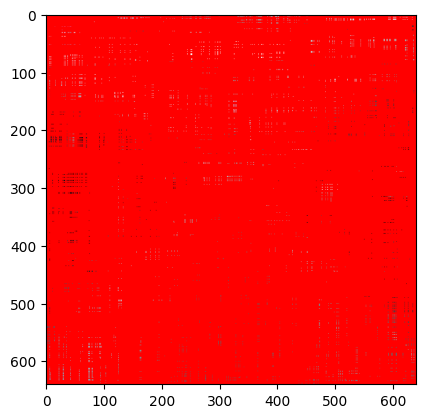

In [30]:
# visualize the results
vis = image.copy()
vis = cv2.resize(vis, (640, 640))
for bbox in raw_bboxes:
  x, y, w, h = bbox[:4]
  vis = cv2.rectangle(vis, (int(x - w/2), int(y - h/2)), (int(x + w/2), int(y + h/2)), (255, 0, 0), 1)
plt.imshow(vis)
plt.show()

The simplest way is by confidence thresholding. If the predicted class has confidence score below the threshold, remove the box.

Number of bboxes that has max confidence larger than threshold: 78


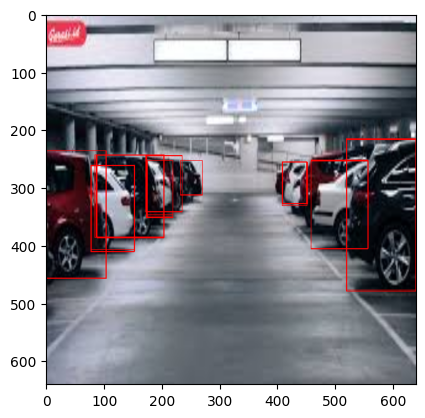

In [31]:
CONFIDENCE_THRESHOLD = 0.5

# get which boxes have confidence above the threshold
raw_bboxes_max_conf = np.max(raw_bboxes[:, 4:], axis=1) > CONFIDENCE_THRESHOLD
# only select the boxes with hight confidence
raw_bboxes_filtered = raw_bboxes[raw_bboxes_max_conf > CONFIDENCE_THRESHOLD]
print("Number of bboxes that has max confidence larger than threshold:", raw_bboxes_filtered.shape[0])

# visualize the results
vis = image.copy()
vis = cv2.resize(vis, (640, 640))
for bbox in raw_bboxes_filtered:
  x, y, w, h = bbox[:4]
  vis = cv2.rectangle(vis, (int(x - w/2), int(y - h/2)), (int(x + w/2), int(y + h/2)), (255, 0, 0), 1)
plt.imshow(vis)
plt.show()

Now that's a lot better! However, there are some problems remains.

- Even though the visualization looks good, the number of boxes is 49. Which means, the are many boxes that represents the same object.
- The visualized image above is based on image in inference size, which is 640x640. We don't want to use the detections in that scale. We need to recale the coordinates back to the original image size.

Let's do the post-processing in the proper way.

### Post-processing

The first step is removing all the clutters. In the previous cell, we know that confidence thresholding is a good way. But, to remove duplicate detections, there is a very popular algorithm called non-maximum suppression (NMS).


In short, NMS is an algorithm that removes/combines boxes that are similar. That similarity is decided based on IoU of one box to another. To put it simple, two boxes with IoU larger than the `IoU threshold` will be combined (or one of them will be removed).

Luckily OpenCV already provides us with NMS algorithm. But, if you want to learn more about NMS, please go [here](https://learnopencv.com/non-maximum-suppression-theory-and-implementation-in-pytorch/).

In [32]:
# OpenCV NMS accepts the following data
#   - bounding boxes in [box_top_left_position_x, box_top_left_position_y, box_width, box_height] or called ltwh
#   - confidence scores of each box

# remember that out current box format is xywh, so we need to convert the format to ltwh
ltwh_raw_bboxes = raw_bboxes[:, :4].copy()
ltwh_raw_bboxes[:, 0] = raw_bboxes[:, 0] - (raw_bboxes[:, 2] / 2)
ltwh_raw_bboxes[:, 1] = raw_bboxes[:, 1] - (raw_bboxes[:, 3] / 2)
# get the confidence scores of each box
raw_scores = np.max(raw_bboxes[:, 4:], axis=1)
# get the class index of each box
raw_classes = np.argmax(raw_bboxes[:, 4:], axis=1)

# fo the NMS
CONFIDENCE_THRESHOLD = 0.5
IOU_THRESHOLD = 0.35

valid_indexes = cv2.dnn.NMSBoxes(ltwh_raw_bboxes, raw_scores, CONFIDENCE_THRESHOLD, IOU_THRESHOLD)
print("Detections after NMS is", len(valid_indexes))

Detections after NMS is 7


Lets, take those final filtered bounding boxes and visualize them.

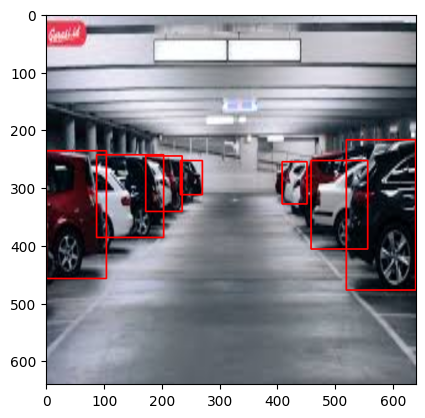

In [33]:
# The OpenCV NMS output is indexes of bounding box that passes the NMS
# So, we need to extract the boxes' data from the original array
# The final predictions will be formatted as 2D array, each row each box,
#   and each column is:
#   - column 0-3: box coordinate in ltwh
#   - column 4: box confidence score
#   - column 5: box class id
predictions_unscaled = np.zeros((len(valid_indexes), 6))
predictions_unscaled[:, :4] = ltwh_raw_bboxes[valid_indexes]
predictions_unscaled[:, 4] = raw_scores[valid_indexes]
predictions_unscaled[:, 5] = raw_classes[valid_indexes]

# visualize results
vis = image.copy()
vis = cv2.resize(vis, (640, 640))
for bbox in predictions_unscaled:
  x1, y1, w, h = bbox[:4]
  vis = cv2.rectangle(vis, (int(x1), int(y1)), (int(x1 + w), int(y1 + h)), (255, 0, 0), 2)
plt.imshow(vis)
plt.show()

Okay, that looks good. Last step is, let's rescale the box coordinates into the original image size.

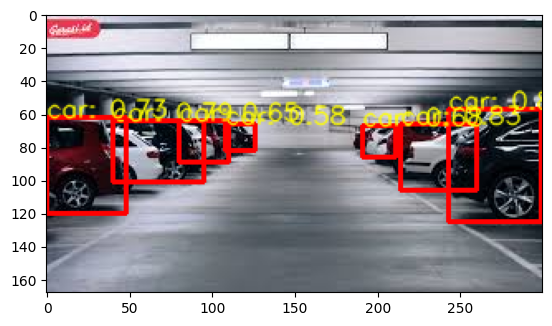

In [34]:
# do the scaling
x_scale = image.shape[1] / 640
y_scale = image.shape[0] / 640
predictions = predictions_unscaled.copy()
predictions[:, [0, 2]] *= x_scale
predictions[:, [1, 3]] *= y_scale

# visualize results
vis = image.copy()
for bbox in predictions:
  x1, y1, w, h, score, class_id = bbox
  vis = cv2.rectangle(vis, (int(x1), int(y1)), (int(x1 + w), int(y1 + h)), (255, 0, 0), 2)

  label = f'{COCO_CLASSES[class_id]}: {score:.2f}'
  cv2.putText(vis, label, (int(x1), int(y1)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)

plt.imshow(vis)
plt.show()